<a href="https://colab.research.google.com/github/ekaterinasukhomlinova/dap-2024/blob/main/les06/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №6. Линейная регрессия

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les06
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Набор данных Diabetes (Диабет) содержит 442 образца с 10-ю признаками: возраст, пол, индекс массы тела, средний показатель давления крови и шесть измерений сыворотки крови. Целевое значение - количественный показатель прогрессирования заболевания через год после анализов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Извлечение данных

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

1. Выведете описание набора данных и наименование признаков.

In [3]:
print(diabetes.DESCR)
print(diabetes.feature_names)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Подготовка данных

2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.

In [4]:
diabetes_df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?

In [5]:
print(diabetes_df.info())
print("\nThere are no categorical features since all features ​​are numbers.\n")
print(diabetes_df.isnull().sum())
print("\nThere are no null values in the dataframe.\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

There are no categorical features since all features ​​are numbers.

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

There are no null values in the dataframe.



## Исследование данных

4. Постройте матрицу корреляции.

In [6]:
matr = diabetes_df.corr()
matr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с  целевым значением, самый высокий.

Text(0.5, 1.0, 'Scatter plot')

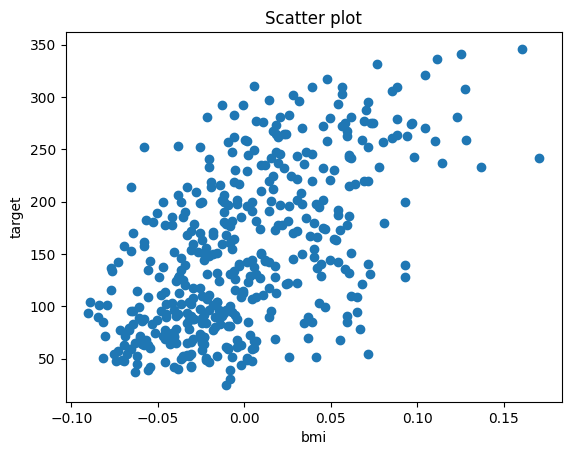

In [7]:
feature = matr.loc[matr['target'] != 1, 'target'].idxmax()
x = diabetes_df[feature]
y = diabetes_df['target']
plt.scatter(x,y)
plt.xlabel(feature)
plt.ylabel("target")
plt.title("Scatter plot")

6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).

In [8]:
features = matr.loc[matr['target'] != 1, 'target'].abs().nlargest(5).index
X = diabetes_df[features]
y = diabetes_df['target']
print(X, y)

          bmi        s5        bp        s4        s3
0    0.061696  0.019907  0.021872 -0.002592 -0.043401
1   -0.051474 -0.068332 -0.026328 -0.039493  0.074412
2    0.044451  0.002861 -0.005670 -0.002592 -0.032356
3   -0.011595  0.022688 -0.036656  0.034309 -0.036038
4   -0.036385 -0.031988  0.021872 -0.002592  0.008142
..        ...       ...       ...       ...       ...
437  0.019662  0.031193  0.059744 -0.002592 -0.028674
438 -0.015906 -0.018114 -0.067642  0.034309 -0.028674
439 -0.015906 -0.046883  0.017293 -0.011080 -0.024993
440  0.039062  0.044529  0.001215  0.026560 -0.028674
441 -0.073030 -0.004222 -0.081413 -0.039493  0.173816

[442 rows x 5 columns] 0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


## Предсказательная модель

7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=42)

8. Выполните обучение модели.

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred[:5])
print(y_test[:5])

[132.80992445 175.05566388 151.18309658 234.55669373 120.24582926]
287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
Name: target, dtype: float64


## Проверка модели

9. Расчитайте Root mean squared error (RMSE)

In [13]:
from sklearn import metrics
print('Root mean squared error (RMSE) = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root mean squared error (RMSE) =  58.51740342454687


10. Расчитайте R² (коэффициент детерминации)

In [14]:
print('R2 = ', np.sqrt(metrics.r2_score(y_test, y_pred)))

R2 =  0.6465342225766915


## Вопросы для защиты

### Ответы на вопросы для защиты

---

#### 1. Какие типы машинного обучения вы знаете?
1. **Обучение с учителем (Supervised Learning)**:
   - Есть метки/цели (например, классификация, регрессия).
   - Пример: Определение возраста пассажира Titanic по его данным.

2. **Обучение без учителя (Unsupervised Learning)**:
   - Нет меток, цель — выявить структуры в данных (кластеризация, снижение размерности).
   - Пример: Кластеризация пассажиров Titanic по возрасту и стоимости билета.

3. **Обучение с подкреплением (Reinforcement Learning)**:
   - Модель обучается на основе награды или наказания за действия.
   - Пример: Алгоритмы для игр или робототехники.

4. **Полу-обучение (Semi-supervised Learning)**:
   - Смешанный подход: используется небольшая часть размеченных данных и большой объем неразмеченных.

---

#### 2. Чем отличается обучение с учителем и без учителя?
- **С учителем**:
  - Есть размеченные данные (X, y), где y — целевая переменная.
  - Примеры: линейная регрессия, деревья решений.
- **Без учителя**:
  - Нет меток, цель — изучение структуры данных.
  - Примеры: k-means, PCA.

---

#### 3. Чем пакетное обучение отличается от динамического?
- **Пакетное обучение**:
  - Модель обучается на всем наборе данных сразу.
  - Пример: тренировка модели на готовом наборе данных Titanic.
  - Преимущества: более стабильное обучение.
  - Недостатки: требуется весь набор данных.

- **Динамическое обучение**:
  - Модель обучается последовательно, получая данные в реальном времени.
  - Пример: обучение рекомендаций на основе пользовательской активности.
  - Преимущества: подходит для потоков данных.
  - Недостатки: сложность реализации.

---

#### 4. Чем обучение на основе образцов отличается от обучения на основе модели?
- **На основе образцов**:
  - Хранение данных, сравнение новых объектов с сохраненными образцами.
  - Пример: алгоритм k-ближайших соседей (k-NN).
  - Недостатки: высокая вычислительная стоимость при прогнозировании.

- **На основе модели**:
  - Создание обобщенной модели, которая извлекает закономерности из данных.
  - Пример: линейная регрессия, случайный лес.
  - Преимущества: быстрее выполняет прогнозирование.

---

#### 5. Что такое линейная регрессия?
- Линейная регрессия — это метод прогнозирования, который устанавливает линейную зависимость между независимыми переменными (X) и зависимой переменной (y):
  \[
  y = w1 x1 + w2 x2 + ... + wn xn + b
  \]
- Пример: предсказание стоимости билета Titanic на основе возраста пассажира.

---

#### 6. Что такое градиентный спуск?
- Градиентный спуск — это оптимизационный алгоритм, используемый для минимизации функции потерь.
- Идея: двигаться в направлении отрицательного градиента функции потерь для нахождения минимального значения.

Основное обновление весов:
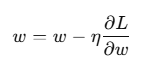  
где n — скорость обучения.

---

#### 7. Как правильно обрабатывать категориальные признаки?
- **Методы обработки**:
  1. **One-Hot Encoding**:
     - Преобразование категорий в бинарные вектора.
  2. **Label Encoding**:
     - Присвоение числовых значений категориям.
  3. **Target Encoding**:
     - Использование средних значений целевой переменной для каждой категории.

Пример: Обработка признака "Embarked" в данных Titanic.

---

#### 8. Что такое матрица корреляции?
- Матрица корреляции показывает линейную зависимость между переменными. Значения варьируются от -1 до 1:
  - **1**: Полная положительная корреляция.
  - **0**: Нет корреляции.
  - **-1**: Полная отрицательная корреляция.
- Используется для анализа взаимосвязей между признаками.

---

#### 9. Что показывает метрика RMSE?
- **RMSE (Root Mean Squared Error)**:
  - Показывает среднюю ошибку модели в тех же единицах, что и целевая переменная.
  - Формула:
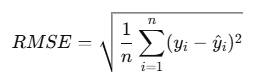  
  - Пример: Используется для оценки точности предсказания стоимости билета.

---

#### 10. Что показывает метрика \(R^2\)?
- **\(R^2\) (Коэффициент детерминации)**:
  - Показывает долю объясненной дисперсии целевой переменной.
  - Значения варьируются от 0 до 1:
    - **1**: Модель идеально объясняет данные.
    - **0**: Модель ничего не объясняет.
  - Формула:
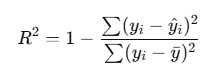  
  - Пример: Оценка качества предсказания возраста пассажиров.

---